In [1]:
from fly_analysis import braidz
from fly_analysis import filtering
from fly_analysis.processing import extract_stimulus_centered_data
import numpy as np
from matplotlib import pyplot as plt
from fly_analysis.plotting import plot_mean_and_std
from fly_analysis.plotting import plot_trajectory
from datetime import datetime
from scipy import stats
from scipy.stats import mannwhitneyu
from scipy.stats import wilcoxon
from scipy.stats import kruskal
from scipy.stats import friedmanchisquare
import pandas as pd
from fly_analysis.trajectory import heading_direction_diff
import matplotlib.ticker as ticker

In [2]:
df, csvs = braidz.read_braidz(r"C:\\Users\\pandey\\Desktop\\Braidz Files\\20241222_140931.braidz")

Reading C:\\Users\\pandey\\Desktop\\Braidz Files\\20241222_140931.braidz using pyarrow


In [3]:
df,csvs["opto"]

(         obj_id    frame     timestamp         x         y         z  \
 0             0    21224  1.734873e+09 -0.042270 -0.030240  0.197519   
 1             0    21225  1.734873e+09 -0.040198 -0.029395  0.198459   
 2             0    21226  1.734873e+09 -0.038926 -0.028046  0.198641   
 3             0    21227  1.734873e+09 -0.037706 -0.026841  0.198227   
 4             0    21228  1.734873e+09 -0.036383 -0.025789  0.197669   
 ...         ...      ...           ...       ...       ...       ...   
 7363731   70417  7230141  1.734945e+09  0.048612 -0.135314  0.005870   
 7363732   70417  7230142  1.734945e+09  0.048604 -0.135296  0.005909   
 7363733   70417  7230143  1.734945e+09  0.048606 -0.135272  0.005903   
 7363734   70417  7230144  1.734945e+09  0.048626 -0.135229  0.005943   
 7363735   70417  7230145  1.734945e+09  0.048630 -0.135221  0.005991   
 
              xvel      yvel      zvel           P00           P01  \
 0        0.280120  0.140141  0.026110  8.153168e-08

In [4]:
data = extract_stimulus_centered_data(df,csvs["opto"])

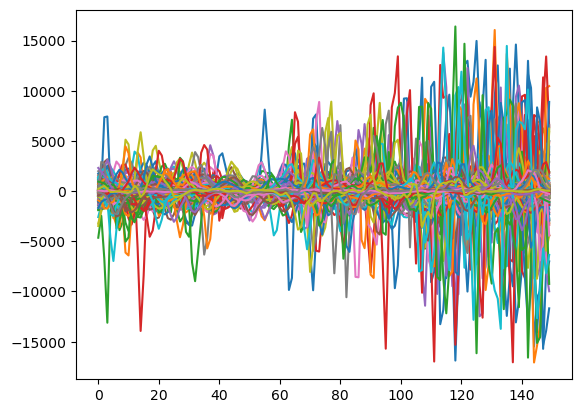

In [5]:
fig = plt.figure()
for d in data["angular_velocity"]:
    plt.plot(d)
plt.show()

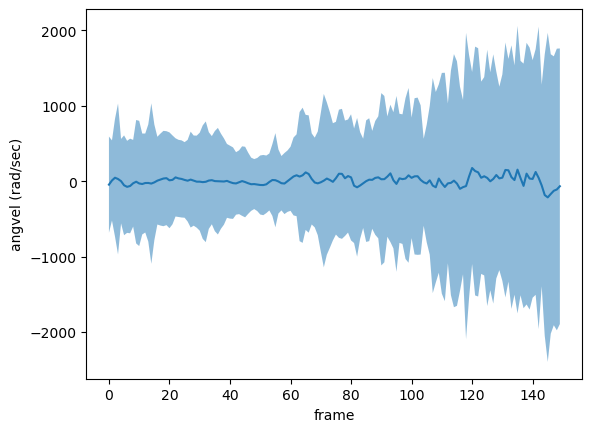

In [6]:
fig, ax = plt.subplots()
plot_mean_and_std(np.array(data["angular_velocity"]), ax=ax)
ax.set_xlabel("frame")
ax.set_ylabel("angvel (rad/sec)")
plt.show()

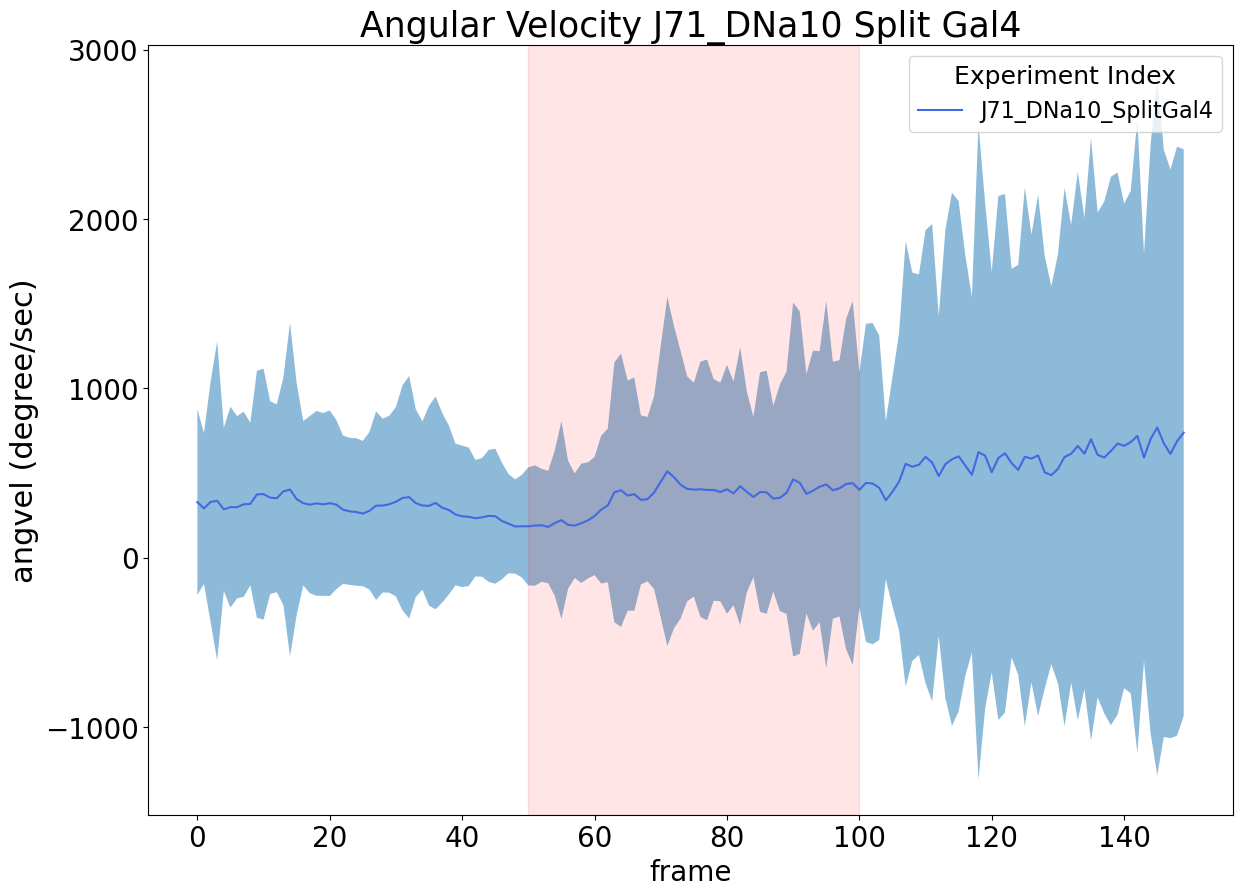

In [7]:
fig, ax = plt.subplots(figsize=(14, 10))
plot_mean_and_std(np.abs(np.array(data["angular_velocity"])), ax=ax, label='J71_DNa10_SplitGal4', color='royalblue')
ax.set_xlabel("frame", fontsize = 20)
ax.set_ylabel("angvel (degree/sec)")
ax.set_title("Ang_Vel Plot")


ax.axvspan(50, 100, color='red', alpha=0.1)
plt.legend(title="Experiment Index", fontsize=16, title_fontsize=18)

plt.title("Angular Velocity J71_DNa10 Split Gal4", fontsize=25)
plt.ylabel("angvel (degree/sec)", fontsize=22)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(False)
